<p style="text-align: center;font-size: 40pt">Descriptive statistics</p>

In [6]:
%matplotlib widget
#%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

import ipywidgets as widgets
plt.style.use('dark_background')

%run ./scripts/helper_func.py

# Overview 

- If a salesman argue that his thermometer is precise at 0.001 &deg;C, would you use it to detect fever?
- Is it satisfying to brag about being over the average grade of an exam if a lot students had high grades?
>TODO: add graph with Beta distribution

Objectives of this module:

- start easy with the math (or not, but at least start)
- introduce part of the notations used in this lecture in a simple context
- recall notions of statistic in 1D, which we will build on for 2D and 3D
- introduce some basic usage of `numpy` and `matplotlib`

Hidden custom latex commands here $ \curvearrowright$

----
[comment]: <> (Useful commands)
$\newcommand{\textcomma}{\quad,}$
$\newcommand{\textdot}{\quad.}$
$\newcommand{\vec}[1]{\mathbf{#1}}$
$\newcommand{\mat}[1]{\mathbf{#1}}$
$\newcommand{\vecsim}[1]{\boldsymbol{#1}}$
$\newcommand{\matsim}[1]{\boldsymbol{#1}}$
$\newcommand{\real}{\mathbb{R}}$
$\newcommand{\E}{\mathrm{E}}$
$\newcommand{\L}{\mathrm{L}}$
$\newcommand{\Var}{\mathrm{Var}}$
$\newcommand{\normal}{\mathcal{N}}$
----

## A complex definition of the mean

Lets define a set $\mathcal{X} = \{x_1, x_2, \dots, x_i\}$, with its cadinality being $|\mathcal{X}| = n $ and $x \in \mathbb{R}$.

We can define the expectation of the set $\mathcal{X}$ using

\begin{equation}
\E[\mathcal{X}] = \sum_i^n p_i x_i  \textcomma
\end{equation}

where $p_i$ is the probability associated to a given $x_i$. 
This can also be understand as a weigthed mean. 
Most of the time, we don't have any prior on the probability of a given $x_i$.
By assuming a uniform distribution (i.e, equal chance weight for all $x_i$), we get the well known aritmetic mean  defined as

\begin{equation}
\E[\mathcal{X}] = \frac{1}{n}\sum_i^n x_i \textdot
\end{equation}

Note that the expectation is considered as the first **raw** moment.
The name "raw" comes from the computation being centered to zero (i.e., the origine), which make it describes roughly the location of the set.
The general equation of the $k$-th raw moment is

\begin{aligned}
\E[\mathcal{X}^k] = \sum_i^n p_i x_i^k  \textcomma
\end{aligned}

but for the context of this lecture, we are only interested in $k=1$.
Depending on how authors write their equations, you will find those synonymes for the 
first raw moment are: 
- mean
- expectation
- $\mu$
- $\E[\mathcal{X}] $
- $\bar{x}$

### Example

We can do an example where all $x_i$ are draw from a uniform distribution.

In [7]:
n = 3000
uni_start = 1.
uni_end = 3.

X = np.random.uniform(uni_start, uni_end, n)
pretty_print(X)

# manual
xbar = 0
for x in X:
    xbar += x # the same as xbar = xbar + x
xbar /= n # the same as xbar = xbar/x
print(xbar)

# with numpy
xbar = np.mean(X)
print(xbar)

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,2.551333,2.83797,2.413608,1.968369,1.909399,1.916483,2.809889,2.660151,1.204534,1.975993,...,1.877807,1.546212,2.365868,2.895905,1.096462,2.943546,2.552134,1.13367,2.757412,1.016851


1.9989200172263215
1.998920017226325


In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,2))

n, _, _, = ax.hist(X, bins=50);
ax.plot(xbar, np.max(n)/5, 'o', color='tab:red');
ax.legend(['mean'])
pretty_ax(ax, 
          'Histogram of $\mathcal{X}$', 
          'Count', 
          'Values of $x_i$')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Variance as a moment

For a set $\mathcal{X}$, the variance $\text{Var}(\mathcal{X})$ corresponds to how much each values vary from the mean $\E[\mathcal{X}]$, and is define as

\begin{equation}
\text{Var}(\mathcal{X}) = \E(\mathcal{X} -\E[\mathcal{X}])^2] \textdot
\end{equation}

In the case of a discreet set, the variance can be computed as

\begin{equation}
\text{Var}(\mathcal{X}) = \sum_i^n p_i (x_i - \bar{x})^2  \textcomma
\end{equation}

with the same simplification for uniform distribution as for $\E[\mathcal{X}]$ leading to

\begin{equation}
\text{Var}(\mathcal{X}) = \frac{1}{n}\sum_i^n (x_i - \bar{x})^2 \textdot
\end{equation}

**Trick**: One interesting thing about a summation of squared values is that it can be easily converted to matrix operations, which are usually better optimized in many programation languages.
Let convert our set $\mathcal{X}$ to a vector $\vec{x} \in \real^n$.
We can than compute the variance using

\begin{aligned}
\text{Var}(\mathcal{X}) &= \frac{1}{n}\vec{x}^T \vec{x} - \bar{x}  \textdot
\end{aligned}


Some useful properties of the variance:
- non negative: $\text{Var}(\mathcal{X}) \leq 0$
- translation invariant: $\text{Var}(\mathcal{X}) = \text{Var}(\mathcal{X}+a)$

The variance is also known as the second **central** moment.
The name "central" comes from that fact that its computation is centered to a raw moment defined in the previous section.
Central moments describe more the spread of the set.
The general equation of the $k$-th central moment is

\begin{equation}
\E(\mathcal{X} -\E[\mathcal{X}])^k] = \sum_i^n p_i (x_i - \bar{x})^k \textdot
\end{equation}

Again, for this lecture, we will only used the **second central moment**, for which some synonyms can be:
- variance
- $\sigma^2$ (not to be confused with $\sigma$ which is named standard deviation)
- $s^2$
- $\text{Var}(\mathcal{X})$
- scale
- spread

## Example

As we did with the mean, we can compute the variance from a uniform distribution.

In [9]:
n = 5000
uni_start = 1.
uni_end = 3.

X = np.random.uniform(uni_start, uni_end, n)
pretty_print(X)

xbar = np.mean(X)

# manual with iterations
var = 0
for x in X:
    var += (x - xbar)**2. # the same as var = var + (x - xbar)^2
var /= n # the same as var = var/x
print(var)

# manual with matrix
var = np.dot(X, X)/n - xbar**2.
print(var)

# with numpy
var = np.var(X)
print(var)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1.417953,2.160068,2.366084,2.459884,1.703876,1.838056,2.709159,2.69823,1.34314,1.260013,...,2.762523,2.453137,1.197337,2.370536,2.451883,1.616576,2.350541,1.386265,2.963437,1.427455


0.33187594703345574
0.331875947033458
0.3318759470334564


In [10]:
sigma = np.sqrt(var)
offset = 10.
plt.close(fig)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,2))

n, _, _, = ax.hist(X, bins=50);
ax.plot(xbar, np.max(n)/5, 'o', color='tab:red');
ax.annotate('', xy=(xbar + sigma/2., np.max(n)/5),
             xytext=(xbar - sigma/2., np.max(n)/5),
             arrowprops=dict(arrowstyle= '|-|', color='tab:red', lw=3)
           )
ax.text(xbar*1.05, np.max(n)/4.5, '$\sigma$', color='tab:red', size=20)

ax.legend(['mean'])
pretty_ax(ax, 
          'Histogram of $\mathcal{X}$', 
          'Count', 
          'Values of $x_i$')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Note that, when plotting a representation of the varianceon the original data, we can only show its square root (i.e., the standard deviation).
Otherwise, the units wouldn't fit.

## One more type of moment...

The last type of moment is the **standardized moment**.
As for the other types of moments, there is a general definition for the  $k$-th standardized moment, but two most popular are the third standardized moment (i.e., skewness) and the forth standardized moment (i.e.,  kurtosis).
Standardized moments are useful as they describe a set in a way that is scale invariant (i.e., invariant to multiply the whole set by a constant (e.g., $a \mathcal{X} = \{a x_1, a x_2, \dots, a x_i\}$).

Skewness gives an idea of how much the set is symmetric, with a skewness of zero meaning perfect symmetry, such as a Gaussian or a uniform distribution.
Kurtosis mesures the level of outliers in a set.
The interpretation of the kurtosis is less intuitive, so people tend to compare with with Normal distribution, which has a kurtosis of 3.
So, a kurtosis larger than 3 would have outliers than a Normal distribution.
As an example, the kurtosis of a uniform distribution is 9/5 (i.e., 1.8).

We won't use those standardized moments for this lecture, but

<img src="images/themoreyouknow.jpg">

## Precision vs accuracy

Being careful between the difference of those terms is useful in engineering, when comparing specification sheets, and in science when comparing your results to other or to ground truth values.

Let start with a entertainting example with a robotic dartboard to explain the difference between precision and accuracy.

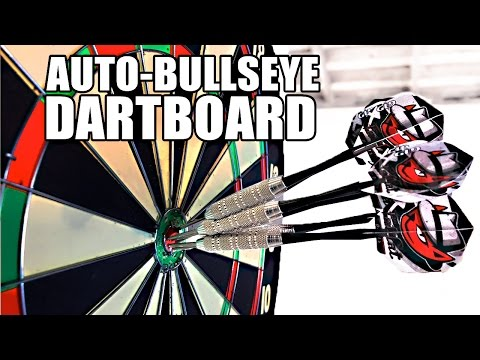

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo('MHTizZ_XcUM', width=720, height=480)

In [12]:
n = 300
u_x = 0.1; sigma_x = 0.4
u_y = 1.0; sigma_y = 0.2

X = np.array([np.random.normal(u_x, sigma_x, n),
              np.random.normal(u_y, sigma_y, n)])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
scat = ax.scatter(X[0,:], X[1,:], zorder=2, alpha = 0.6)

draw_dartboard(ax)

def update(is_display = False, u_x = 0., sigma_x = 0.1, u_y = 0., sigma_y = 0.1):

    if(is_display):
        X = np.array([np.random.normal(u_x, sigma_x, n),
                      np.random.normal(u_y, sigma_y, n)])
        scat.set_offsets(X.T)
        scat.set_visible(True)
    else:
        scat.set_visible(False)
        
    
    fig.canvas.draw_idle()

widgets.interact(update, u_x = (-2.5, 2.5, 0.1), sigma_x = (0.1, 1.5, 0.1), u_y = (-2.5, 2.5, 0.1), sigma_y = (0.1, 1.5, 0.1));
pretty_ax(ax,
         'A dartboard',
         'y',
         'x')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(Checkbox(value=False, description='is_display'), FloatSlider(value=0.0, description='u_x…

In [13]:
n = 300

u_1 = [1.0, 1.]
sigma_1 = [0.2, 0.2]

X1 = np.array([np.random.normal(u_1[0], sigma_1[0], n),
              np.random.normal(u_1[1], sigma_1[1], n)])

u_2 = [-1.0, 1.]
sigma_2 = [0.4, 0.4]
X2 = np.array([np.random.normal(u_2[0], sigma_2[0], n),
              np.random.normal(u_2[1], sigma_2[1], n)])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.scatter(u_1[0], u_1[1], zorder=3, edgecolors='b')
ax.scatter(u_2[0], u_2[1], zorder=3, edgecolors='b')
scat1 = ax.scatter(X1[0,:], X1[1,:], zorder=2, alpha = 0.2)
scat2 = ax.scatter(X2[0,:], X2[1,:], zorder=2, alpha = 0.2)


draw_dartboard(ax)

def update(is_display = False):
    if(is_display):
        scat1.set_visible(True)
        scat2.set_visible(True)
    else:
        scat1.set_visible(False)
        scat2.set_visible(False)
    
widgets.interact(update);
pretty_ax(ax,
         'A dartboard',
         'y',
         'x')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(Checkbox(value=False, description='is_display'), Output()), _dom_classes=('widget-intera…

Robotic arms typically report precision insteast of accuracy.
An arm with high precision means that it is high repeatable, but when given commands in global coordinates, might be off the expected pose.
This is why a lot of cobots (i.e., collaborative robots) are programmed by putting the arm somewhere where and then ask to repeat the task.

As an example, here is the arm from Mecademic, a company from Montreal making miniature arms.

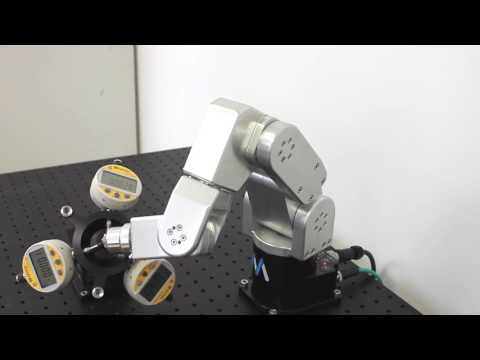

In [14]:
from IPython.display import YouTubeVideo
YouTubeVideo('Aagm-z4nvRo', width=720, height=480)

## Robust statistic

We often want to project multidimensional results, 2D in our example of dartboard, in one dimension to simplify the interpretation.
A typical way of doing so, it to compute an error $e$ (i.e., a scalar) based on the Euclidean distance from a result $\vec{x}$ to a ground truth value $\vec{g}$, such that

\begin{aligned}
e 
&=  \lVert \vec{x} - \vec{g} \rVert_2 \\
&=  \sqrt{\sum_i^d ( x_j - g_j} )^2
\textcomma
\end{aligned}

where both vectors $\vec{x}$ and $\vec{g}$ are $d$-dimensional vectors $\in \real^n$ and where $x_j$ and $g_j$ are individual component of each vector.
The is also known as $\L^2$-norm, thus the notation $\lVert \cdot \rVert_2 $.
We will dig deeper in the concept of distances later when learning about point cloud registrations.

When we have a set of trials $\mathcal{X} = \{ \vec{x}_1, \vec{x}_2, \cdots, \vec{x}_n \}$, we can report the mean error $\bar{e}$ over all trials using 

\begin{aligned}
\bar{e}
&=  \E \big[ \lVert \mathcal{X} - \vec{g} \rVert_2 \big] \\
&=  \frac{1}{n} \sum_i^n \lVert \vec{x}_i - \vec{g} \rVert_2 
\textdot
\end{aligned}

Note here that $\mathcal{X}$ is now a set composed of vectors instead of scalars used in prior sections.


Another way to achieve the same result is to build a second set of **residual errors** $\mathcal{E} = \{ \vec{e}_1, \vec{e}_2, \cdots, \vec{e}_n  \}$, where $\vec{e}_n = (\vec{x}_i - \vec{g})$. 
This representation will be useful when explaining the optimization process to register point clouds.
Then, we can simply write

\begin{aligned}
\bar{e}
&=  \E \big[ \lVert \mathcal{E} \rVert_2 \big] 
\textdot
\end{aligned}

### Example

Lets reuse our dartboard example from the last section and explicit how the different throws were modeled.
The dartboard is on the $xy$-plane, so our observation set $\mathcal{X}$ will have 2D vectors.
We can formalize the construction of the set by saying $\vec{x} \sim \normal(\vecsim{\mu}, \matsim{\Sigma})$, where $\normal$ is a normal distribution, $\vecsim{\mu} \in \real^2$, and $\matsim{\Sigma} = \mat{I}\vecsim{\sigma}$, with $\sigma \in \real^2$.
Another way to explain it, it's simply to say that $\mathcal{X}$ is build from two independant normal distribution.
The cardinality of our set is $|\mathcal{X}| = n$, which means that we have $n$ observations in our set.

In [15]:
n = 3000
u_x = 0.1; sigma_x = 0.4
u_y = 1.0; sigma_y = 0.2

X = np.array([np.random.normal(u_x, sigma_x, n),
              np.random.normal(u_y, sigma_y, n)])
E = np.linalg.norm(X, axis=0)

plt.close(fig)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(5,5))
scat = axs[0,0].scatter(X[0,:], X[1,:], zorder=2, alpha = 0.6,
                        s=10,
                        color='tab:blue')
draw_dartboard(axs[0,0])
pretty_ax(axs[0,0],
         'A dartboard', 'y', 'x')


# y
_, _, bars_y = axs[0,1].hist(X[1,:], bins=50, 
                                    orientation="horizontal")
axs[0,1].set_ylim((-3., 3.))
pretty_ax(axs[0,1], 'Histogram of $\mathcal{X}$', 'y', 'count')
# x
_, _, bars_x = axs[1,0].hist(X[0,:], bins=50)
axs[1,0].set_xlim((-3., 3.))
axs[1,0].invert_yaxis()
pretty_ax(axs[1,0], 'Histogram of $\mathcal{X}$', 'count', 'x')
# E 
_, _, bars_e = axs[1,1].hist(E, bins=50)
axs[1,1].set_xlim((0., 3.))
pretty_ax(axs[1,1], 'Histogram of $\mathcal{E}$', 'count', 'e')

def update(u_x = 0., sigma_x = 0.4, u_y = 0., sigma_y = 0.4):
    global bars_y, bars_x, bars_e
    X = np.array([np.random.normal(u_x, sigma_x, n),
                  np.random.normal(u_y, sigma_y, n)])
    E = np.linalg.norm(X, axis=0)
    
    scat.set_offsets(X.T)
    scat.set_visible(True)
    
    # y
    t = [b.remove() for b in bars_y]
    count, bins, bars_y = axs[0,1].hist(X[1,:], bins=50, 
                                        orientation="horizontal",
                                       color='tab:blue')
    # x
    t = [b.remove() for b in bars_x]
    count, bins, bars_x = axs[1,0].hist(X[0,:], bins=50, 
                                        color='tab:blue')
    # E
    t = [b.remove() for b in bars_e]
    count, bins, bars_e = axs[1,1].hist(E, bins=50,
                                       color='tab:blue')
        
    fig.canvas.draw_idle()

widgets.interact(update, u_x = (-2.5, 2.5, 0.1), sigma_x = (0.1, 1.5, 0.1), u_y = (-2.5, 2.5, 0.1), sigma_y = (0.1, 1.5, 0.1));
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='u_x', max=2.5, min=-2.5), FloatSlider(value=0.4, des…

The problem here is that, eventhough we use normal distributions to construct $\mathcal{X}$, after computing the Euclidean distance the distribution of $\mathcal{E}$ is asymetric.
This asymetry is particulary apparent when variances are large and the means are close to zero.

At this point, we need to make a difference between the **mode** of a distribution and the mean:
- mode: the most probable value of a distribution (i.e., the peak)
- mean: the center of mass of a distribution

The mean and the mode are the same for symmetric distributions (e.g., uniform, normal), but can differ highly for asymmetric distributions.
For example, a Cauchy distribution as no mean, but has a mode.
This distribution is known has "heavy tail", so much that we need to truncate each extremity to plot it.

In [16]:
n = 1000000
x_lim = 2.

X = np.random.standard_cauchy(n)

# truncate distribution so it plots well
X = X[(X>-x_lim) & (X<x_lim)]  # comment to see what happen!

plt.close(fig)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,3))
ax.hist(X, bins=50);
pretty_ax(ax, 'Histogram of a Cauchy distribution', 'count', 'x')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Here are some examples of modes, means, median, standard deviation (std), and  interquartile ranges (IQR) for two distributions.
We can see that mean and variance can cause problem when one assumes that it is the same as the mode for a skew distribution.
This problem is often observed in scientific paper adding error bars to their results with the lower error bar being negative for a distance (i.e., something that can only be positive).

In [17]:
n = 1000000
u_1 = 0.
sigma_1 = 2.
u_2 = 3.
sigma_2 = 1.

X1 = np.random.normal(u_1, sigma_1, n)
mean1 = np.mean(X1)
var1 = np.var(X1)
quart1 = np.quantile(X1, [0.25, 0.5, 0.75])

X2 = np.random.lognormal(u_1, sigma_2, n)
mean2 = np.mean(X2)
var2 = np.var(X2)
quart2 = np.quantile(X2, [0.25, 0.5, 0.75])

# truncate distribution so it plots well
X = X[(X>-x_lim) & (X<x_lim)]  # comment to see what happen!

plt.close(fig)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5,5))

# normal
n, bins, _, = axs[0].hist(X1, bins=50);
mode1 = (bins[np.argmax(n)] + bins[np.argmax(n)+1])/2.
axs[0].axvline(mode1, color='white', linewidth=2);
axs[0].plot(mean1, np.max(n)/5, 'o', color='tab:red');
axs[0].plot(quart1[1], np.max(n)/3, 'o', color='tab:blue');
axs[0].annotate('', xy=(mean1 + var1/2., np.max(n)/5),
             xytext=(mean1 - var1/2., np.max(n)/5),
             arrowprops=dict(arrowstyle= '|-|', color='tab:red', lw=2)
           )
axs[0].annotate('', xy=(quart1[2], np.max(n)/3),
             xytext=(quart1[0], np.max(n)/3),
             arrowprops=dict(arrowstyle= '|-|', color='tab:blue', lw=2)
           )
pretty_ax(axs[0], 'Histogram of a normal distribution', 'count', 'x')
axs[0].legend(['mode', 'mean, std', 'median, IQR'])

#log-normal
X2 = X2[(X2<4.5)] # truncate distribution so it plots well
n, bins, _, = axs[1].hist(X2, bins=50);
mode2 = (bins[np.argmax(n)] + bins[np.argmax(n)+1])/2.
axs[1].axvline(mode2, color='white', linewidth=2);
axs[1].plot(mean2, np.max(n)/5, 'o', color='tab:red');
axs[1].plot(quart2[1], np.max(n)/3, 'o', color='tab:blue');

axs[1].annotate('', xy=(mean2 + var2/2., np.max(n)/5),
             xytext=(mean2 - var2/2., np.max(n)/5),
             arrowprops=dict(arrowstyle= '|-|', color='tab:red', lw=2)
           )
axs[1].annotate('', xy=(quart2[2], np.max(n)/3),
            xytext=(quart2[0], np.max(n)/3),
             arrowprops=dict(arrowstyle= '|-|', color='tab:blue', lw=2)
           )
pretty_ax(axs[1], 'Histogram of a log-normal distribution', 'count', 'x')
axs[1].set_xlim([-1., 4.5])
axs[1].legend(['mode', 'mean, std', 'median, IQR'])

plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

When we want to use the mean to estimate the mode, we can use robust statistics to lower the impact of outliers.
The arithmetic mean is not a robust estimator.
If a single point in the set equal to infinity, the mean will also be infinity.
This is not the case for the median, which is a robust estimator.
Another way to handle outliers, is to come back to our definition of the expectation.

\begin{equation}
\E[\mathcal{X}] = \sum_i^n p_i x_i  \textdot
\end{equation}

Instead of assuming a uniform distribution for all elements in a set, we can make a better assumption about the probability $p_i$.
For example, with better knowledge about the problem at hand, one could define a better range for the uniform distribution, trimming a percentage of the tail (i.e., trimmed mean), or use any known probability distribution such as the normal distribution.

In [18]:
n = 300000
u_x = 0.1; sigma_x = 1.4
u_y = 2.5; sigma_y = 2.8

X = np.array([np.random.normal(u_x, sigma_x, n),
              np.random.normal(u_y, sigma_y, n)])
E = np.linalg.norm(X, axis=0)
# uniform distribution
p1 = (E < 4.)/len(E)
# normal distribution
mu = 0.
sigma = 2.7
p2 = np.exp( - (E - mu)**2 / (2 * sigma**2) )

plt.close(fig)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5,6))


n, bins, _, = axs[0].hist(E, bins=50, color=colors[0], density=True, alpha=1.)
mode = (bins[np.argmax(n)] + bins[np.argmax(n)+1])/2.
axs[0].axvline(mode, color='white', linewidth=2);
axs[0].plot(np.mean(E), np.max(n)/5, 'o', color='tab:red');
pretty_ax(axs[0], 'Histogram of Euclidean distance', 'count', 'e')
axs[0].legend(['mode', 'mean'])

axs[1].hist(E, bins=50, weights=p1, color=colors[2], density=True, alpha=1.)
axs[1].axvline(mode, color='white', linewidth=2);
axs[1].plot(np.average(E, weights=p1), np.max(n)/5, 'o', color='tab:red');
pretty_ax(axs[1], 'Robust estimation with uniform distribution', 'count', 'e')
axs[1].legend(['original mode', 'weighted mean'])

axs[2].hist(E, bins=50, weights=p2, color=colors[4], density=True, alpha=1.)
axs[2].axvline(mode, color='white', linewidth=2);
axs[2].plot(np.average(E, weights=p2), np.max(n)/5, 'o', color='tab:red');
pretty_ax(axs[2], 'Robust estimation with gaussian distribution', 'count', 'e')
axs[2].legend(['original mode', 'weighted mean'])


plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Conclusion

Actions:
- add notes and annotations in the markdown to help you review the material later
- run the code in your notebook and play with the parameters to understand the behavior of the computation show as examples.
- do the [exercises](../../exercises/uncertainty/1e-exercises_descriptive_statistics.ipynb) related to this lesson

At the end, you should be able to 
- relate: expectation, mean, raw moment, center of mass, accuracy
- relate: expectation, variance, central moment, spread, precision
- differ: mode, mean, median
- understand: why the mean is not robust
- apply: use `numpy` and `matplotlib`
- apply: use `latex` for mathematical demonstrations



### Symbol definitions

| Symbol             | Definition            |
|--------------------|-------------          |
| $\mathcal{X}$      | set                   |
| $|\mathcal{X}|$    | cardinality of a set (i.e., how many elements in a set) |
| $x$                | scalar                |
| $\vec{x}$          | vector                |
| $x_i$              | $i^{\text{th}}$ scalar of a set                |
| $\real$       | real set              |
| $\normal$       | normal distribution              |
| $\E[\mathcal{X}]$       | expectation of the set $\mathcal{X}$             |
| $\in$              | ... is part of ...           |

### Glossary

| English             | Français   |
|-----------          |------------|
| expectation         | espérance |
| raw moment          | moment ordinaire |
| central moment      | moment centré    |
| standardized moment | moment centré réduit |
| precision           | précision  |
| accurary            | exactitude |
| outliers            | valeurs aberrantes |